<a href="https://colab.research.google.com/github/jeong75/univ-textmining-project/blob/main/%EA%B8%B0%EB%B3%B8%EB%B6%84%EC%84%9D_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os

# 구글 드라이브 연결
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


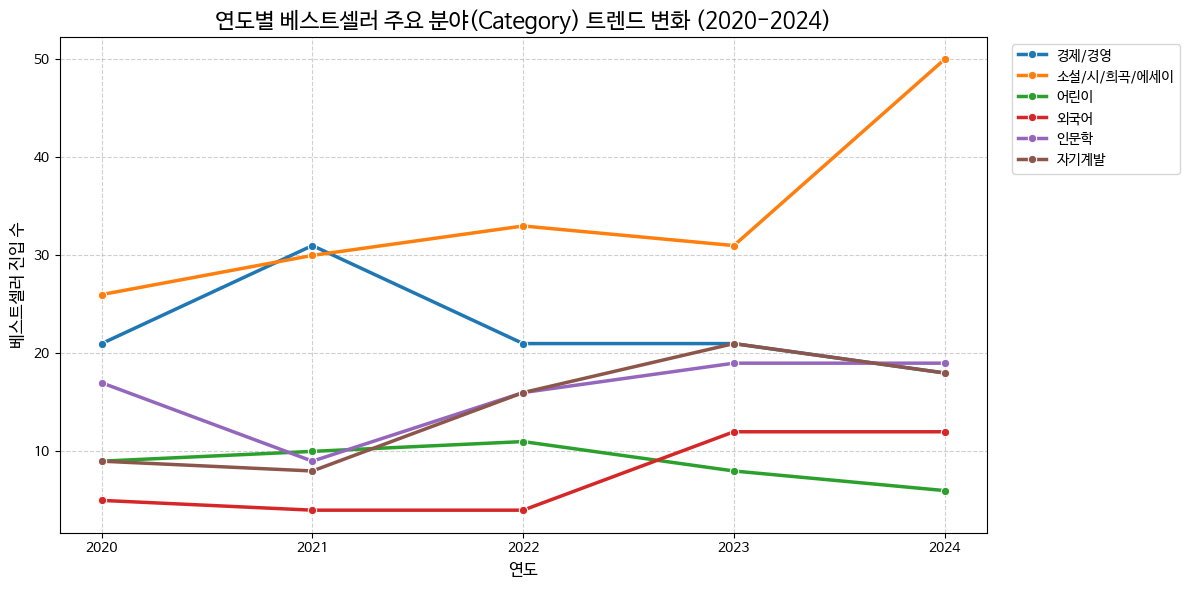

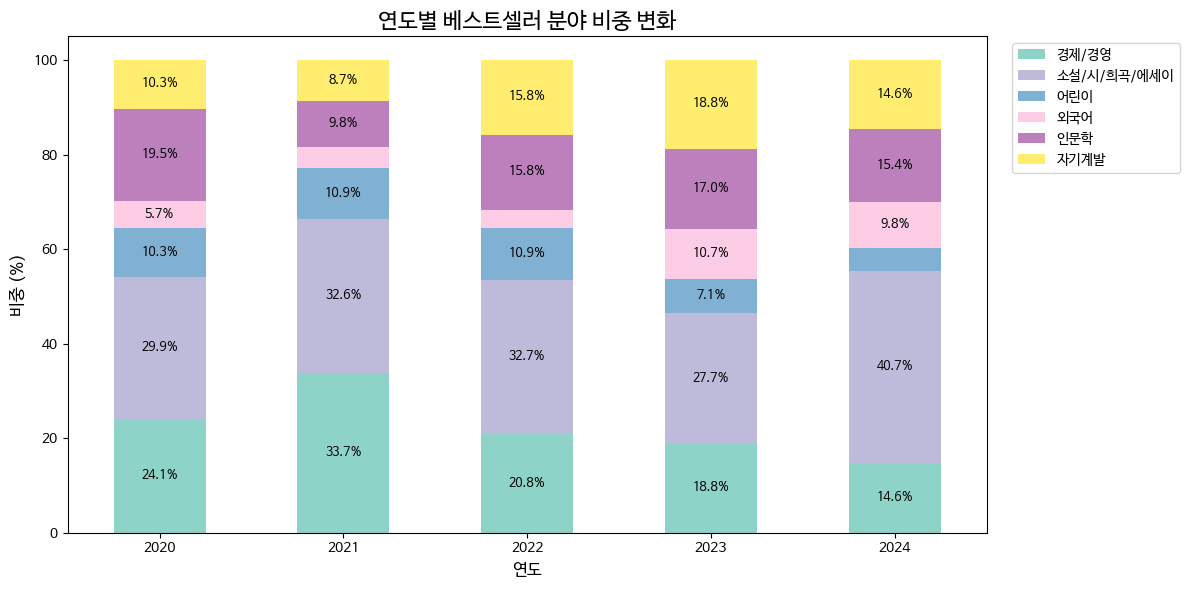

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from matplotlib.ticker import MaxNLocator

# 1. 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 2. 데이터 로드
file_path = '/content/gdrive/My Drive/project/도서DB/bestseller_DB(20-24)_titleNorm.csv'
try:
    df = pd.read_csv(file_path)
except:
    df = pd.read_csv(file_path, encoding='cp949')

# 3. 데이터 전처리
def parse_years(year_str):
    try:
        return ast.literal_eval(year_str)
    except:
        return []

df['year_list'] = df['bestseller_year'].apply(parse_years)
df_exploded = df.explode('year_list')
df_exploded = df_exploded.rename(columns={'year_list': 'Year'})

df_exploded = df_exploded.dropna(subset=['Year']) # 비어있는 연도 제거
df_exploded['Year'] = df_exploded['Year'].astype(int)

# 4. 주요 카테고리 선정 및 집계
top_categories = df_exploded['category'].value_counts().head(6).index
df_filtered = df_exploded[df_exploded['category'].isin(top_categories)]
category_counts = df_filtered.groupby(['Year', 'category']).size().reset_index(name='Count')
category_pivot = category_counts.pivot(index='Year', columns='category', values='Count').fillna(0)

# 5. 시각화 1: 꺾은선 그래프
plt.figure(figsize=(12, 6))

sns.lineplot(data=category_counts, x='Year', y='Count', hue='category',
             marker='o', linewidth=2.5, palette='tab10')

plt.title('연도별 베스트셀러 주요 분야(Category) 트렌드 변화 (2020-2024)', fontsize=16)
plt.xlabel('연도', fontsize=12)
plt.ylabel('베스트셀러 진입 수', fontsize=12)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

# 6. 시각화 2: 100% 누적 막대그래프
category_pivot_pct = category_pivot.div(category_pivot.sum(axis=1), axis=0) * 100
ax = category_pivot_pct.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')

plt.title('연도별 베스트셀러 분야 비중 변화', fontsize=16)
plt.xlabel('연도', fontsize=12)
plt.ylabel('비중 (%)', fontsize=12)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=0) # X축 레이블 가로 정렬

for c in ax.containers:
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 5 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=9)

plt.tight_layout()
plt.show()